## Decision Tree

### 概念
决策树是一种**预测模型**，代表的是对象（特征）属性与对象值之间的一种映射关系。树中每个节点表示某个对象，而每个分叉路径则代表某个可能的属性值，而每个叶节点则对应从根节点到该叶节点所经历的路径所表示的对象的值。

从数据产生决策树的ML技术叫做“决策树学习”，目的是从训练数据集种归纳出一组分类规则.

#### 表示：

**判断模块（decision block）**：针对属性进行判断

**终止模块（terminating block）**：表示已经得出结论，可以终止运行

**分支（branch）**：可以到达另一个判断模块或终止模块

根节点：

内部节点：也称决策节点

叶节点：

<mark>**标签**：决策树中又为“分类条目”，测试数据集的标签可以是**二元**的，即yes或no，1或0...，如此构建的可能是二叉树</mark>

#### 基本流程：
决策树是一个由根到叶的**递归过程**，在每一个中间结点寻找划分属性，递归重要的是设置**停止条件**：

（1）当前结点包含的样本属于同一类别，无需划分；

（2）当前属性集为空，或是所有样本在所有属性上取值相同无法划分，简单理解就是当分到这一节点时，所有的属性特征都用完了，没有特征可用了，就根据label数量多的给这一节点打标签使其变成叶节点（其实是在用样本出现的后验概率做先验概率）；

（3）当前结点包含的样本集合为空，不能划分。这种情况出现是因为该样本数据缺少这个属性取值，根据父结点的label情况为该结点打标记（其实是在用父结点出现的后验概率做该结点的先验概率）。


#### 目标：
构造的算法能够读取数据集合，构建出一棵决策树。由于决策树很多任务都是为了数据中所蕴含的知识信息，因此决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，ML算法最终将使用这些规则。


### 决策树ML算法构建流程：
（1）**收集数据**：可以用任何方法

（2）**准备数据**：树构造算法只适用于标称型数据（在有限的数据中取，结果只有y或n，一般用于分类），因此数值型数据必须离散化

（3）**分析数据**：可以使用任何方法，构造树完成之后，应检查图形是否符合预期

（4）**训练算法**：构造树的数据结构

（5）**测试算法**：使用经验树计算错误率

（6）**使用算法**：可适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义!

### 决策树的构造

#### 1、（关键）讨论数学上如何使用*信息论*划分属性：
每次划分数据集时只选取一个特征属性，如果训练集中存在多个特征，第一次选择哪个特征作为划分的参考属性？事实上**决定性的特征或属性**能划分出最好的结果，所以必须**评估每个特征**。完成评估测试后，原始数据集就被划分为几个数据子集，并分布在第一个决策点的所有分支上。**若某个分支下的所有数据都属于同一类型（用类别标签判断），则说明当前已经正确划分数据分类，无需进一步对数据集进行分割；若数据子集内的数据不属于同一类型，则需要重复划分数据子集的过程（是一个递归过程），直到所有具有相同类型的数据均在一个数据子集内.**

属性划分过程由创建分支的递归函数**createBranch**完成：
```cpp
if so return <类别标签>;
else
    寻找划分数据集的最好特征
    划分数据集
    创建分支节点
        for 每个划分的子集
            调用函数createBranch()并增加返回结果到分支节点中
    return 分支节点
```
实际上我们使用**ID3算法**划分数据集，该算法处理如何划分数据集、何时停止划分数据集。每次划分数据集时我们只选取一个特征属性。如果训练集中存在20个特征，**第一次应该选择哪个特征作为划分的参考属性？** 所以必须使用量化的方法（香农熵）判断如何划分数据.

<mark>**划分数据集的最大原则：将无序的数据变得更加有序**.</mark>组织杂乱数据的一种方法是：使用信息论度量信息(信息论是决策树的数学基础).

划分数据集前后信息发生的变化称为“**信息增益**”（information gain），通过计算每个特征值划分数据集后获得的信息增益，<mark>**增益最高的特征就是最好的选择**</mark>.在决策树学习中，信息增益是特征选择的一个重要指标，它定义为一个特征能够为分类系统带来多少信息，信息越多，说明特征越重要.

##### 1.1、熵（Entropy）
用于描述事件的不确定性，单位是bit.若某个事件有$n$个结果，每个结果的概率为 $p_n$。那么这个事件的熵$H(p)$的定义为：

$$H(p)=-\sum_{i=1}^{n}p_i\log_2{p_i}$$

熵越大含有的信息量就越大，不确定性更强.

##### 1.2、条件熵
在某些条件下，不确定性会发生变化.条件熵衡量的是在某个条件$X$下，事件$Y$的不确定性，记作$H(Y|X)$.其定义为：

$$H(Y|X)=\sum_{i=1}^{n}p_iH(Y|X=x_i)$$

可理解为，$X$事件每个可能性的结果的熵乘以发生概率的求和.

##### 1.3、信息增益（Information gain）
信息增益是在知道某个条件后，事件的不确定性下降程度，记作$g(X,Y)$.计算方式为熵减去条件熵：

$$g(X,Y)=H(Y)-H(Y|X)$$

表示的是，知道了某个条件后，原来事件不确定性降低的幅度.

##### 1.4、信息增益率
分析可知，信息增益其实是对可取数目较多的属性有所偏好。所以信息增益并不是一个很好的特征选择度量，于是引出了信息增益率。

$g_r$即$Gain\_ratio$，$H(Y)$是（特征）属性的固有值

$$g_r(X,Y)=\frac{g(X,Y)}{H(Y)}$$

##### 1.5、基尼系数
与熵一样，基尼系数表征的也是事件的不确定性，将熵定义式中的“$-\log_{2}p_i$”替换为 “$1-p_i$”就是基尼系数.

$$Gini(p)=\sum_{i=1}^{n}p_i(1-p_i)$$

变形：

$$Gini(p)=\sum_{i=1}^{n}(p_i-p_i^2)=1-\sum_{i=1}^{n}p_i^2$$

\*基尼不纯度（Gini impurity）是另一个度量集合无序程度的方法，简单说就是从一个数据集中随机选取子项，度量其被错误分类到其他分组里概率.

#### 2、编写代码将理论应用到具体的数据集上：
计算给定数据集的信息熵：$n$为分类条目

$$H(p)=-\sum_{i=1}^{n}p_i\log_2{p_i}$$

\***可以看到信息熵计算和特征值无关**

In [5]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    # 统计每组特征向量
    for featVec in dataSet:
        currentLabel = featVec[-1]
        # 如果标签没有放入统计次数的字典，添加进去
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

##### 示例：
假设海洋生物数据表：
|  |不浮出水面是否可以生存   | 是否有脚蹼  |  属于鱼类 |
| :----: | :----:  | :----:  | :----:  |
| 1  | 是 | 是 | 是 |
| 2  | 是 | 是 | 是 |
| 3  | 是 | 否 | 否 |
| 4  | 否 | 是 | 否 |
| 5  | 否 | 是 | 否 |

利用createDataSet函数得到表所示的简单鱼鉴定数据集：

In [6]:
def createDataSet():
    dataSet = [[1, 1,'yes'],
            [1, 1, 'yes'],
            [1, 0, 'no'],
            [0, 1, 'no'],
            [0, 1, 'no']]
    #分类属性（给定特征）
    labels = ['no surfacing','filppers']
    #返回数据集和分类属性
    return dataSet, labels

In [7]:
myDat, labels = createDataSet()
print(myDat)
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


0.9709505944546686

**Labels**: 'yes','no'

$p_{yes}=\frac{2}{5}\space\space p_{no}=\frac{3}{5}$

实际计算：$H=-\frac{2}{5}\log_2{(\frac{2}{5})}-\frac{3}{5}\log_2{(\frac{3}{5})}=0.9709505944546686\dots$

**混合的数据越多，熵越高**。尝试向数据集中添加更多的分类（名为maybe的类），观察熵的变化：

In [8]:
myDat[0][-1] = 'maybe'
print(myDat)
calcShannonEnt(myDat)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


1.3709505944546687

完成使用Shannon熵度量数据集的无序程度后，我们的分类器已经能够在划分数据集后，判断当前划分方法是否正确（可以想象为一个分布在二维空间的数据散点图，需要在数据之间划一道线，将其分成两部分，划得好不好已经有了判断方法了）.

**splitDataSet函数**定义了：在给定特征后划分数据集的操作。其中使用了3个输入参数：（1）待划分的数据集；（2）划分数据集的特征；（3）特征的返回值。

In [9]:
# 按照给定特征划分数据集：
def splitDataSet(dataSet, axis, value):
    # 创建返回的数据集列表，避免修改原始数据集
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]    # 去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])    # 将符合条件的添加到返回的列表
            retDataSet.append(reducedFeatVec)
            
    # 返回划分后的数据集
    return retDataSet

选择最好的数据集划分方式：

In [10]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; 
    bestFeature = -1
    
    for i in range(numFeatures):
        # 创建唯一的分类标签列表
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        
        # 循环计算每种划分方式的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy -newEntropy
        
        # 计算最好的信息增益，找到最好的特征划分方式
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i  # 返回最好特征划分的索引值
    print("before dataset:\n",dataSet)
    print("after dataset:\n",subDataSet)
    return bestFeature

In [11]:
chooseBestFeatureToSplit(myDat)

before dataset:
 [[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
after dataset:
 [[1, 'maybe'], [1, 'yes'], [0, 'no'], [0, 'no']]


0

示例：

特征B包含的所有特征值存入featlist，通过python内置的set()合并相同数值：
```py
featlist=(1,1,0,1,1) -> uniqueVals=(1,0)
```
当选择以特征值“1”划分时：
```py
when value (in uniqueVals) is '1', axis = 1(choosed feat.B):
```
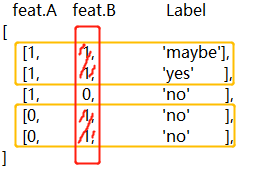

In [12]:
splitDataSet(myDat, 1, 1)

[[1, 'maybe'], [1, 'yes'], [0, 'no'], [0, 'no']]

```
   feat.A      Label
[
    [1,	      'maybe'],
    [1,       'yes'],
    [0,	      'no'],
    [0,	      'no']
]
```

后续计算特征值“0”，并比较两者的信息增益。很明显，特征值“1”的信息增益更高.

#### 3、编写代码构建决策树：
得到原始数据集然后基于最好的属性值划分，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分，第一次划分后，数据将被向下传递到树分支的下一个节点，再这个节点熵，可以再次划分数据，因此可以采用递归原则处理数据集，**递归结束的条件是：程序遍历完所有划分数据集的属性，或每个分支下的所有实例都具有相同的分类（相同Label）**，如果是这样则得到一个叶子节点或终止块。任何到达叶子节点的数据必然属于叶子节点的分类。

如果数据集已经处理了所有属性，但是类标签依然不是唯一的，此时我们需要决定如何定义该叶子节点，在这种情况下，我们通常会采用多数表决（和kNN相同的方法）决定该叶子节点的分类。

majorityCnt函数使用分类名称的列表，然后创建键值为classList中唯一值的数据字典，**字典对象存储了classList中每个类标签出现的频率**，最后利用operator操作键值**排序字典**，并返回出现次数最多的分类：

In [13]:
import operator

# 统计classList中每个元素出现的次数
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [22]:
# 创建树的函数代码
def createTree(dataSet, Labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):    #若类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree

myTree包含了很多代表树结构信息的嵌套字典：

In [25]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
print('decision tree:\n',myTree)

before dataset:
 [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
after dataset:
 [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
before dataset:
 [[1, 'yes'], [1, 'yes'], [0, 'no']]
after dataset:
 [['yes'], ['yes']]
decision tree:
 {'no surfacing': {0: 'no', 1: {'filppers': {0: 'no', 1: 'yes'}}}}


### 绘制注解树形图

决策树的主要优点就是：直观、易于理解，所以要通过绘制（plot）发挥优势

#### matploitlib注解
mat提供了注解工具annotations，可以在数据图像上添加文本注解。

创建treePlotter.py新文件：

In [30]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va='center', ha='center', bbox=nodeType, arrowprops=arrow_args)

def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('a decision node',(0.5,0.1),(0.1,0.5), decisionNode)
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8), leafNode)
    plt.show()

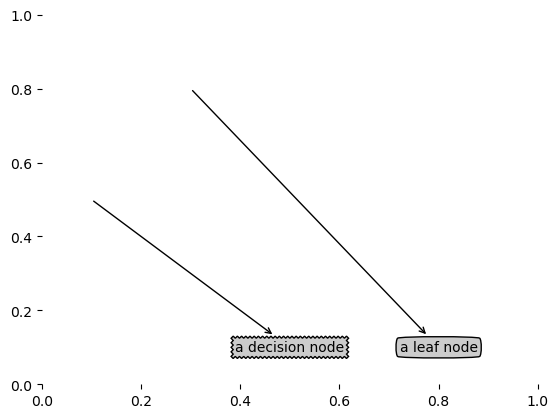

In [31]:
createPlot()

#### 构造注解树
